1/1 [==============================] - 2s 2s/step
Top 3 predictions for image 1 :
1. nematode: 11.52%
2. matchstick: 7.36%
3. digital_clock: 3.67%
Original class for image 1 : cat


<ipython-input-2-1d564fccb256>:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  original_class = cifar10_labels[int(y_test[i])]


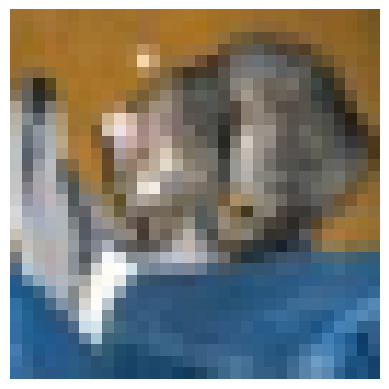




1/1 [==============================] - 0s 240ms/step
Top 3 predictions for image 2 :
1. nematode: 12.06%
2. matchstick: 7.43%
3. digital_clock: 3.74%
Original class for image 2 : ship


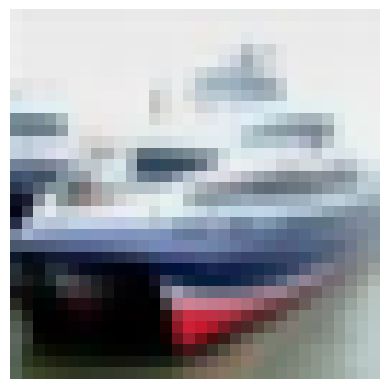




1/1 [==============================] - 0s 250ms/step
Top 3 predictions for image 3 :
1. nematode: 11.15%
2. matchstick: 7.36%
3. digital_clock: 3.68%
Original class for image 3 : ship


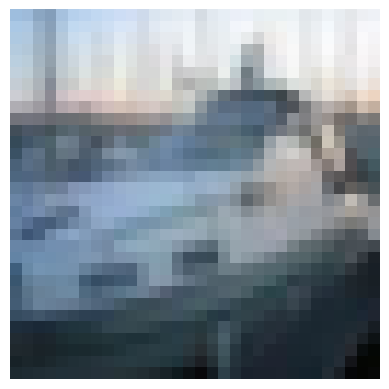




1/1 [==============================] - 0s 247ms/step
Top 3 predictions for image 4 :
1. nematode: 12.11%
2. matchstick: 7.61%
3. digital_clock: 3.74%
Original class for image 4 : airplane


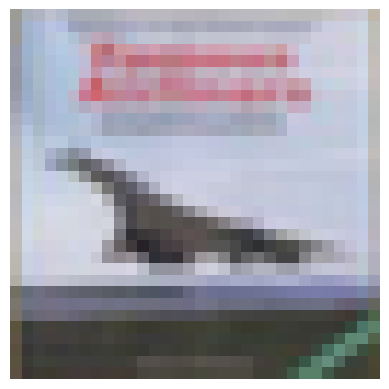




1/1 [==============================] - 0s 241ms/step
Top 3 predictions for image 5 :
1. nematode: 11.71%
2. matchstick: 7.41%
3. digital_clock: 3.66%
Original class for image 5 : frog


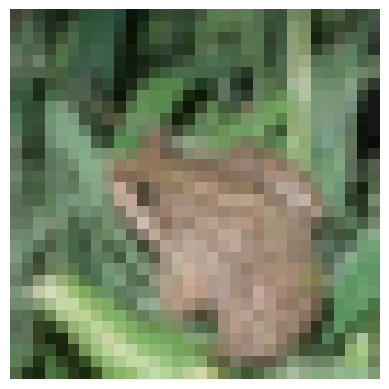

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.transform import resize

# Load CIFAR-10 class labels
cifar10_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Load pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

#print(model.summary())

# Iterate over the first 5 images in the test set
for i in range(5):
    # Select the image
    img = x_test[i]

    # Resize the image to fit InceptionV3 input shape (299, 299)
    img = resize(img, (299, 299))

    # Expand dimensions to make it suitable for prediction
    img = np.expand_dims(img, axis=0)

    # Preprocess the image for InceptionV3 model
    img = preprocess_input(img)

    # Make predictions
    predictions = model.predict(img)

    # Decode top predictions
    decoded_predictions_top3 = decode_predictions(predictions, top=3)[0]

    # Print top 3 predictions
    print("Top 3 predictions for image", i+1, ":")
    for j, (imagenet_id, label, score) in enumerate(decoded_predictions_top3):
        print("{}. {}: {:.2f}%".format(j+1, label, score * 100))

    # Print original class
    original_class = cifar10_labels[int(y_test[i])]
    print("Original class for image", i+1, ":", original_class)

    # Display the image
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.show()
    print("\n\n")


32/32 [==============================] - 15s 192ms/step - loss: 2.4109 - accuracy: 0.1090
Test Accuracy: 10.90%
32/32 [==============================] - 5s 131ms/step


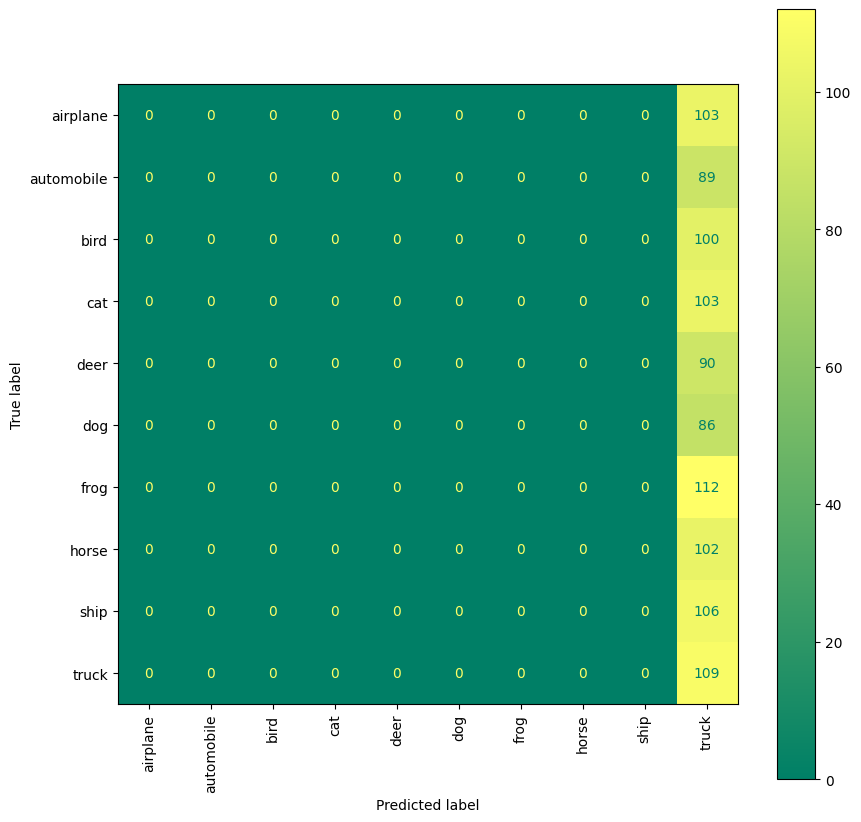

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00       112
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00       106
           9       0.11      1.00      0.20       109

    accuracy                           0.11      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.11      0.02      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load CIFAR-10 class labels
labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

# Load CIFAR-10 dataset
(_, _), (X_test, y_test) = cifar10.load_data()

# Load pre-trained InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add new classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Select only the first 1000 images for evaluation
X_test_first1000 = X_test[:1000]
y_test_first1000 = y_test[:1000]

# Scale and resize the data
X_test_resized = np.array([resize(img, (299, 299, 3)) for img in X_test_first1000])
X_test_resized = preprocess_input(X_test_resized)

# Transform target variable into one-hot encoding
y_cat_test = to_categorical(y_test_first1000, 10)

# Evaluate the model
evaluation = model.evaluate(X_test_resized, y_cat_test)

print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')

# Make predictions
y_pred = model.predict(X_test_resized)
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_first1000, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
plt.show()

# Print classification report
print(classification_report(y_test_first1000, y_pred))


In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.datasets import cifar10
from skimage.transform import resize
import numpy as np

# Load CIFAR-10 dataset
(_, _), (X_test, y_test) = cifar10.load_data()
img = X_test[0]

# Load pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

# Resize the image to fit InceptionV3 input shape (299, 299)
img = resize(img, (299, 299))

# Expand dimensions to make it suitable for prediction
img = np.expand_dims(img, axis=0)

# Preprocess the image for InceptionV3 model
img = preprocess_input(img)

# Make predictions
predictions = model.predict(img)

# Decode top predictions
decoded_predictions = decode_predictions(predictions, top=1)[0]

pred_label = decoded_predictions[0][1]
score = decoded_predictions[0][2] * 100

print("{}: {:.2f}%".format(pred_label, score))

1/1 [==============================] - 2s 2s/step
nematode: 11.52%
